<a href="https://colab.research.google.com/github/ehekaanldk/ML-study/blob/main/ML_section04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*코드 버전업: v1.0 코드 그대로 사용*

In [ ]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Hypothesis using matrix

$$
H(x_1, x_2, x_3)=w_1x_1+w_2x_2+w_3x_3+b
$$

In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

cost function / loss function

In [ ]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

Minimize

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

Launch

In [ ]:
sess = tf.Session()

Initializes graph & Run

In [ ]:
sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                        feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y:y_data})
  if step % 10 == 0:
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

Matrix

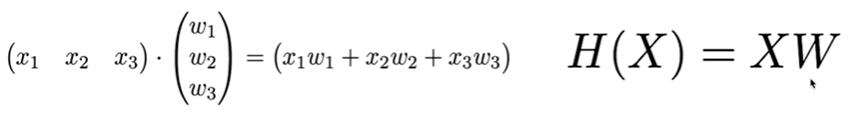

In [ ]:
# [73., 80., 75.]가 하나의 인스턴스로 x1 x2 x3 를 의미한다. .
# 입력(X)은 (인스턴스의 개수, variable의 개수)로 (5 , 3)이다.
# 예측(Y)는 (인스턴스의 개수, y) 로 (5, 1)이다.
x_data = [[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.,], [185.], [180.], [196.], [142.]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) +  b

cost function / loss function

In [ ]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

Minimize

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

Launch

In [ ]:
sess = tf.Session()

Initializes graph & Run

In [ ]:
sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _ = sess.run(
      [cost, hypothesis, train],
                        feed_dict={X: x_data, Y:y_data})
  if step % 10 == 0:
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

-----------

파일에서 데이터 읽어오기

In [ ]:
# loadtxt() 함수로 파일의 데이터를 읽어올 수 있다.
# 파일명과 분별자, 데이터의 타입을 지정해 준다.
# 단점으로는 파일 내의 데이터의 타입이 하나로 모두 동일해야 한다.
import numpy as np

xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

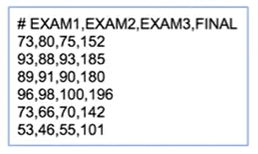 에서 x_data는 다음과 같으며
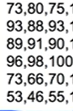
y_data는 다음과 같다.
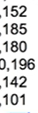

In [ ]:
# 입력 X는 (인스턴스의 개수, variable의 개수) = (6, 3)
# 예측 Y는 (인스턴스의 개수, Y) = (6, 1)
X = tf.placeholder(tf.float32, shape=[None,3])
Y = tf.placeholder(tf.float32, shape=[None,1])

# 가중치 W는 (variable의 개수, Y) = (3, 1)
# 바이어스 b는 (Y) = 출력값으로 1
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X,W) + b

cost function / loss function

In [ ]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

Minimize

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

Launch

In [ ]:
sess = tf.Session()

Initializes graph & Run

In [ ]:
sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _ = sess.run(
      [cost, hypothesis, train],
                        feed_dict={X: x_data, Y:y_data})
  if step % 10 == 0:
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

In [ ]:
print("Your score will be ", sess.run(hypothesis, feed_dict={X: [[100,70,101]]}))
print("Other scores will be", sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

파일이 매우 커서 메모리에 한번에 올리기 어려울 경우는 Qeue Runner를 사용한다.

여러 개의 파일을 읽어와 큐에 쌓고 reader와 decoder로 분리하여 큐에 쌓는다. 사용하고자 하는 batch만큼 큐에서 꺼내서 사용할 수 있다.

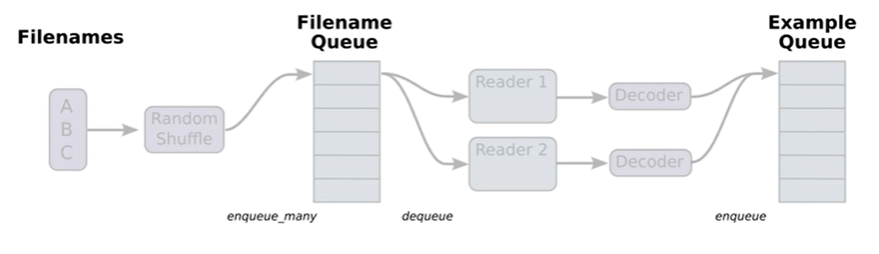

1. 파일들의 리스트를 만들어준다.

In [ ]:
filename_queue = tf.train.string_input_producer(
    ['data-01-test-score.csv', 'data-02-test-score.csv', ...], shuffle=False, name='filename_queue'
)

2. 파일을 읽어올 reader를 정의해준다.

In [ ]:
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

3. 읽어온 value와 데이터 타입으로 decoder를 정의한다.



In [ ]:
# value를 csv로 decord한다.
record_defults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

4. batch를 가지고 데이터를 가져온다.

In [ ]:
train_x_batch, train_y_batch = \
  tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

In [ ]:
# 입력 X는 (인스턴스의 개수, variable의 개수) = (6, 3)
# 예측 Y는 (인스턴스의 개수, Y) = (6, 1)
X = tf.placeholder(tf.float32, shape=[None,3])
Y = tf.placeholder(tf.float32, shape=[None,1])

# 가중치 W는 (variable의 개수, Y) = (3, 1)
# 바이어스 b는 (Y) = 출력값으로 1
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X,W) + b

cost function / loss function

In [ ]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

Minimize

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

Launch

In [ ]:
sess = tf.Session()

Initializes graph & Run

In [ ]:
sess.run(tf.global_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
  x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
  cost_val, hy_val, _ = sess.run(
      [cost, hypothesis, train],
                        feed_dict={X: x_data, Y:y_data})
  if step % 10 == 0:
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

In [ ]:
coord.request_stop()
coord.join(threads)